# Data Deep Dive: A practical Python Project
- Using public domain data from https://www.kaggle.com/datasets/shivamb/netflix-shows

### Central Question: How has Netflix's content strategy evolved over time across regions and content types, and what does this tell us about its global growth and audience targeting?


#### Sub-questions to answer the central question:
1. How has the content volume evolved over time?<br>

2. Which countries have seen the fastest growth in content production?<br>

3. What genres have gained prominence in recent years?

4. Is there a trend in the average duration of content?

5. How has the balance between mature and family-friendly content evolved?

6. How do genres and content ratings differ across top-producing countries?

7. What insights can be drawn about Netflix’s globalization strategy?

### Data Preprocessing <br>
    - Load and inspect Data
    - Handle missing values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
file_path = "/Users/jiwoo/Desktop/META CODE/week 2 - Python/[Materials] Intro to Python/Final Review/netflix_titles.csv"
netflix_df = pd.read_csv(file_path)
#netflix_df.head()

print(netflix_df.info())
print(netflix_df.isnull().sum())

netflix_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# handle the misisng values
# drop the row that misses the key colum values  - title, type, release year
netflix_df = netflix_df.dropna(subset=['title', 'type', 'release_year'])

# fill out the missing values with 'Unknown' values
netflix_df = netflix_df.fillna('Unknown')
print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce') # convert to datetime 
netflix_df.info() #맨 앞에 있으면 자동으로 print됨
netflix_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 1. How has the content volume evolved over time?<br>
    - What are the trends in content additions (Movies vs. TV Shows) over the years?
    - Are there specific periods of significant content expansion?

<Figure size 1200x600 with 0 Axes>

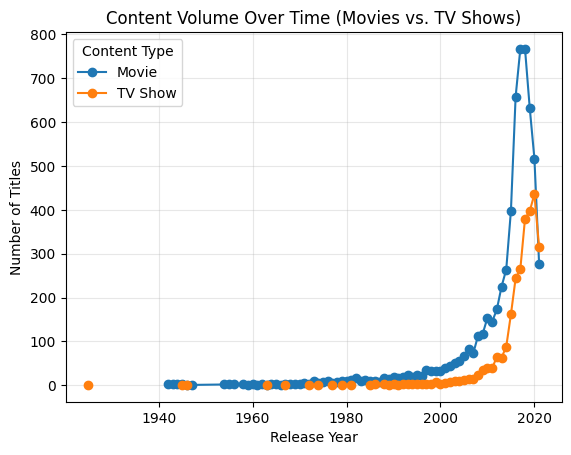

In [ ]:
content_counts = netflix_df.groupby(['release_year', 'type']).size() #size() returns the number of rows in each group 
content_counts = content_counts.reset_index(name  = 'count') # add a new column 'count' to the DataFrame
content_counts = content_counts.pivot(index = 'release_year', columns='type', values='count') #매년 각 콘텐츠 유형 개수 정리
content_counts

plt.figure(figsize=(12,6))
content_counts.plot(kind='line', marker = 'o', linestyle = '-') #₩
plt.title('Content Volume Over Time (Movies vs. TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(alpha = 0.3)
plt.legend(title = 'Content Type')
plt.show()

### 2. Which countries have seen the fastest growth in content production?<br>
    - Are there emerging regions producing more content for Netflix?
    - Has Netflix shifted its focus to specific regions to attract new audiences?

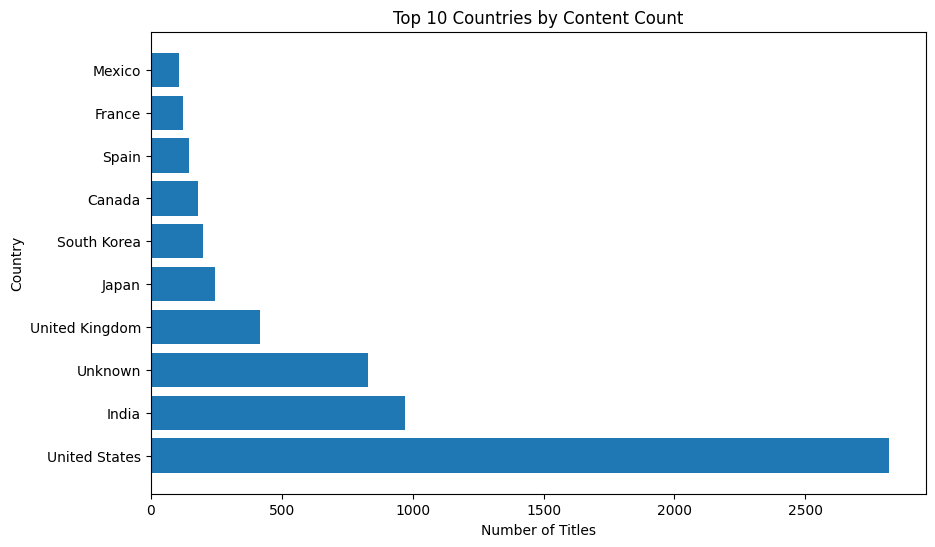

In [ ]:
county_counts = netflix_df['country'].value_counts().head(10) # Get the top 10 countries by content count

plt.figure(figsize=(10, 6))
plt.barh(county_counts.index, county_counts.values)
plt.title('Top 10 Countries by Content Count')
plt.ylabel('Country')
plt.xlabel('Number of Titles')
plt.show()

### 3. What genres have gained prominence in recent years?
    - Which genres have experienced the most growth in content volume?
    - Are there regional differences in genre preferences?

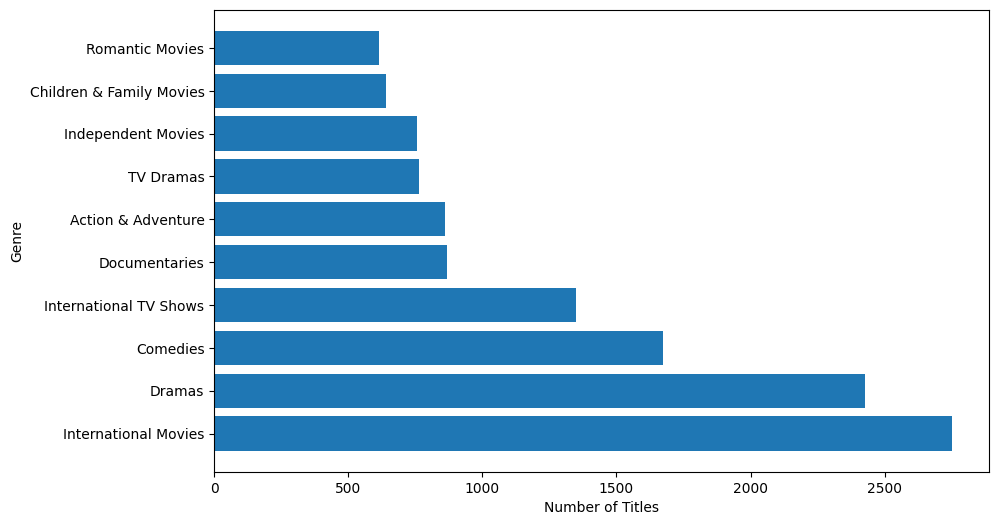

In [ ]:
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ' ) # Split the 'listed_in' column into a list of genres so that we can analyze the genres more easily
# netflix_df
genre_df = netflix_df.explode('genre_list')
genre_df.head()
genre_counts = genre_df['genre_list'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(genre_counts.index, genre_counts.values)
plt.ylabel('Genre')
plt.xlabel('Number of Titles')
plt.show()


### 4. Is there a trend in the average duration of content?
    - How has the length of movies and TV shows changed over time?
    - Are certain genres associated with longer or shorter content?

/var/folders/1j/csvfbjv53g5f4hdpfv7z67p40000gn/T/ipykernel_85910/2076753117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)


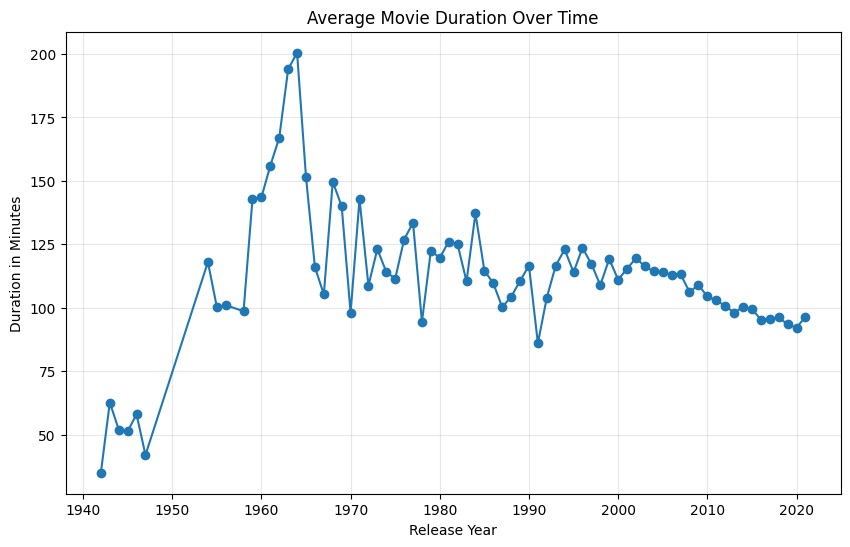

In [ ]:
movies = netflix_df[netflix_df['type']== 'Movie'] # Filter the DataFrame to include only movies
movies.head() 
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float) # Extract the numeric part of the duration and convert it to float

avg_duration_per_year = movies.groupby('release_year')['duration'].mean() # Calculate the average duration of movies per year
avg_duration_per_year

plt.figure(figsize=(10,6))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.grid(alpha = 0.3)
plt.title('Average Movie Duration Over Time')
plt.show()

### 5. How has the balance between mature and family-friendly content evolved?
    - Are there noticeable shifts in the distribution of content ratings (e.g., PG, R)?
    - Is Netflix increasingly targeting a specific age group?

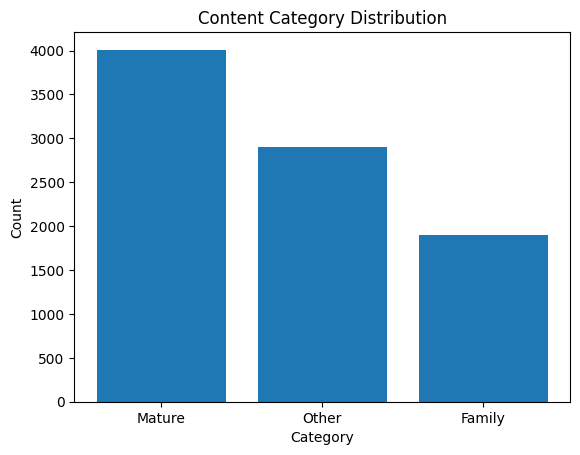

In [ ]:
# define categories
mature_ratings = ['R', 'NC-17', 'TV-MA']
family_ratings = ['G', 'PG', 'PG-13', 'TV-G', 'TV-PG']

netflix_df['content_category'] = netflix_df['rating'].apply(
    lambda x: 'Mature' if x in mature_ratings else 'Family' if x in family_ratings else 'Other'
) # Assign categories based on ratings

category_counts = netflix_df['content_category'].value_counts() # Count the number of titles in each category

plt.figure()
plt.bar(category_counts.index, category_counts.values)
plt.title('Content Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### 6. How do genres and content ratings differ across top-producing countries?

    - Are certain countries producing more family-oriented or mature content?
    - Are there genre trends specific to specific regions?


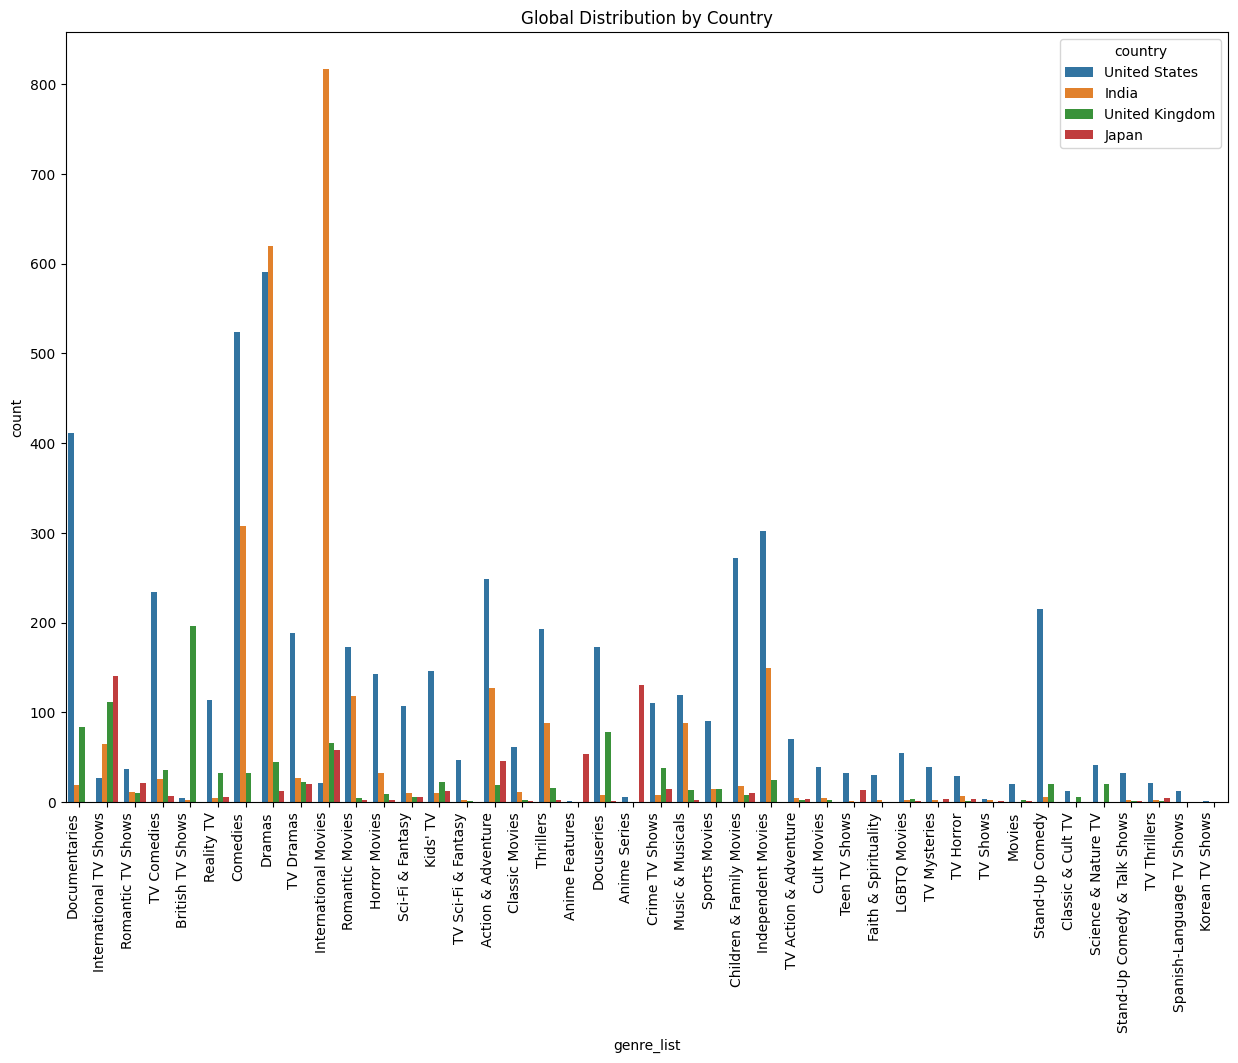

In [ ]:
import seaborn as sns # Visualization library 
top_countries = ['United States', 'India', 'United Kingdom', 'Japan']
filtered_data = netflix_df[netflix_df['country'].isin(top_countries)] #create a filtered DataFrame for the top countries
 
filtered_data = filtered_data.explode('genre_list') 
plt.figure(figsize=(15, 10))
sns.countplot(data=filtered_data, x='genre_list', hue='country') # seaborn's countplot to visualize the distribution of genres by country
plt.xticks(rotation=90, ha = 'right')
plt.title('Global Distribution by Country')
plt.show()

### 7. What insights can be drawn about Netflix’s globalization strategy?
    - Based on content growth and regional focus, what strategic moves is Netflix making to expand its global presence?
    - Are there indications of a regional content acquisition strategy to appeal to new markets?


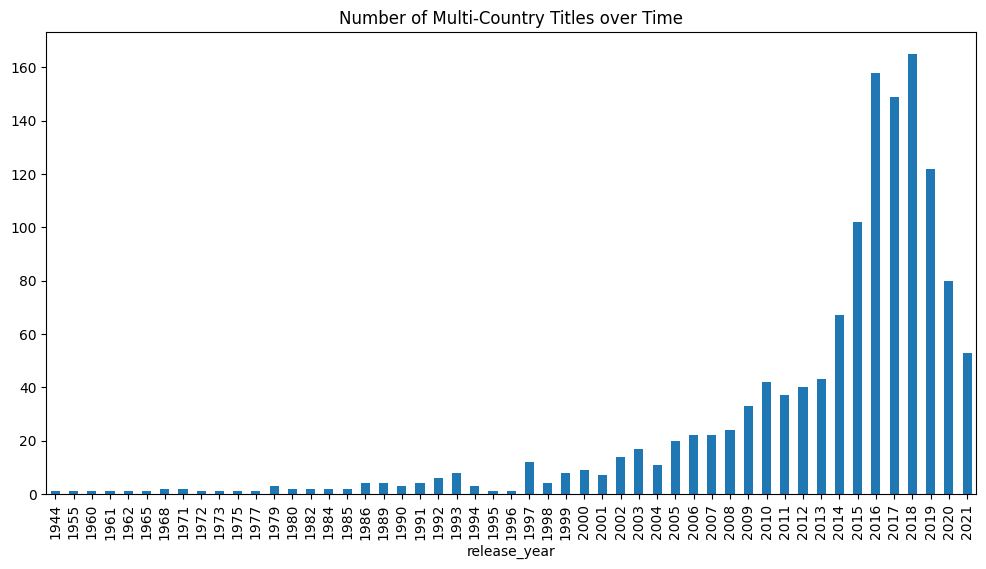

In [40]:
netflix_df['num_countries'] = netflix_df['country'].apply(lambda x: len(str(x).split(',')))

multi_country_titles = netflix_df[netflix_df['num_countries']>1]

multi_country_counts = multi_country_titles['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
multi_country_counts.plot(kind = 'bar')
plt.title('Number of Multi-Country Titles over Time')
plt.show()

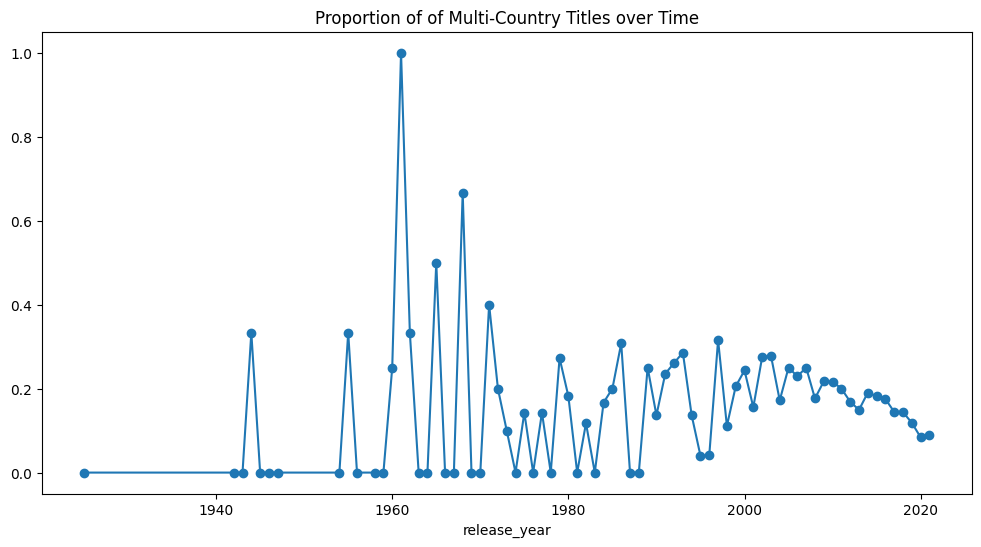

In [42]:
total_per_year = netflix_df['release_year'].value_counts().sort_index()

multi_country_ratio = (multi_country_counts / total_per_year).fillna(0)

plt.figure(figsize=(12,6))
multi_country_ratio.plot(kind = 'line', marker ='o')
plt.title('Proportion of of Multi-Country Titles over Time')
plt.show()

### Conclusion
#### Central Question: How has Netflix's content strategy evolved over time across regions and content types, and what does this tell us about its global growth and audience targeting?


- Content Volumne has grown over time.
- US, India, UK and Japan are Top producing countries.
- Top genres include Drama and Comedy followed by Documentaries.
- Netflix is growing globally by making more local content for each region rather than the co-production. And this help them better connect with loacal audiences while expanding their reach worldwide.